<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/pytorch_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0it [00:00, ?it/s]

100%|█████████▉| 170041344/170498071 [00:15<00:00, 7991010.31it/s]

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


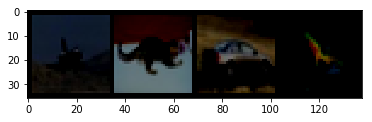

plane   cat   car  frog


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
def imshow(img):
  img = img / 2
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.217


170500096it [00:30, 7991010.31it/s]                               

[1,  4000] loss: 1.868
[1,  6000] loss: 1.675
[1,  8000] loss: 1.557
[1, 10000] loss: 1.504
[1, 12000] loss: 1.436
[2,  2000] loss: 1.390
[2,  4000] loss: 1.360
[2,  6000] loss: 1.333
[2,  8000] loss: 1.305
[2, 10000] loss: 1.287
[2, 12000] loss: 1.277
Finished Training


In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(_))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
          x`
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 51 %
Accuracy of   car : 70 %
Accuracy of  bird : 34 %
Accuracy of   cat : 48 %
Accuracy of  deer : 37 %
Accuracy of   dog : 40 %
Accuracy of  frog : 71 %
Accuracy of horse : 66 %
Accuracy of  ship : 71 %
Accuracy of truck : 66 %


# Warn-up Numpy

In [0]:
import numpy as np
def sigmoid(x , derv = False):
  if derv == False:
    return 1 / np.sum(1, np.exp(-x))
  return np.np.matmul(x,1-x)
N, D_in, H, D_out = 64, 1000, 100, 10
x = np.random.rand(N, D_in)
y = np.random.rand(N, D_out)
# x(64,1000) y(64,10)

w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)
# w1(1000, 100) w2(100,10)

# (64,1000) (1000,100) (100,10) (10)

lr = 0.000001

In [0]:
for epoch in range(500):
  layer1 = x.dot(w1)
  layer1_relu = np.maximum(layer1, 0 )
  y_pred = layer1_relu.dot(w2)
  
  loss = np.sum(np.square(y_pred - y ))
  print("epoch {:d} \tloss {:.3f}".format(epoch, loss))
  # Backprop to compute gradients of w1 and w2 with respect to loss
  grad_y_pred = 2.0 * (y_pred - y )
  grad_w2 = layer1_relu.T.dot(grad_y_pred)
  
  grad_h_relu = grad_y_pred.dot(w2.T)
  grad_h = grad_h_relu.copy()
  grad_h[layer1 < 0] = 0
  
  grad_w1 = x.T.dot(grad_h)
  
  w1 -= lr * grad_w1
  w2 -= lr * grad_w2
  

In [0]:
import torch 
dtype = torch.float
device = torch.device("cpu")

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device= device, dtype = dtype)
y = torch.randn(N, D_out, device = device, dtype = dtype)

w1 = torch.randn(D_in, H,device = device, dtype = dtype )
w2 = torch.randn(H, D_out,device = device, dtype = dtype)

lr = 0.000001

for epoch in range(500):
  h = x.mm(w1)
  h_relu  = h.clamp(min = 0)
  y_pred = h_relu.mm(w2)

    # Compute and print loss
  loss = (y_pred - y).pow(2).sum().item()
  print(epoch, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
  grad_y_pred = 2.0 * (y_pred - y)
  grad_w2 = h_relu.t().mm(grad_y_pred)
  grad_h_relu = grad_y_pred.mm(w2.t())
  grad_h = grad_h_relu.clone()
  grad_h[h < 0] = 0
  grad_w1 = x.t().mm(grad_h)

  w1 -= lr * grad_w1
  w2 -= lr * grad_w2  

In [0]:
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)
for t in range(500):
  y_pred = x.mm(w1).clamp(min=0).mm(w2)
  loss = (y_pred - y).pow(2).sum()
  print(t, loss.item())  
  loss.backward()
  with torch.no_grad():
    w1 -= lr * w1.grad
    w2 -= lr * w2.grad

        # Manually zero the gradients after updating weights
    w1.grad.zero_()
    w2.grad.zero_()

In [21]:
import torch
from torch.nn import Linear, ReLU

N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model  = torch.nn.Sequential(
    Linear(D_in, H),
    ReLU(),
    Linear(H, D_out),
)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
loss_fn = torch.nn.MSELoss(reduction="sum")
for epoch in range(500):
  y_pred = model(x)
  loss = loss_fn(y_pred, y)
  print("epoch {} \t với mỗi loss {:.3f}".format(epoch,loss))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  

epoch 0 	 với mỗi loss 673.933
epoch 1 	 với mỗi loss 672.217
epoch 2 	 với mỗi loss 670.504
epoch 3 	 với mỗi loss 668.795
epoch 4 	 với mỗi loss 667.090
epoch 5 	 với mỗi loss 665.391
epoch 6 	 với mỗi loss 663.698
epoch 7 	 với mỗi loss 662.011
epoch 8 	 với mỗi loss 660.327
epoch 9 	 với mỗi loss 658.647
epoch 10 	 với mỗi loss 656.970
epoch 11 	 với mỗi loss 655.296
epoch 12 	 với mỗi loss 653.625
epoch 13 	 với mỗi loss 651.958
epoch 14 	 với mỗi loss 650.294
epoch 15 	 với mỗi loss 648.633
epoch 16 	 với mỗi loss 646.977
epoch 17 	 với mỗi loss 645.325
epoch 18 	 với mỗi loss 643.679
epoch 19 	 với mỗi loss 642.035
epoch 20 	 với mỗi loss 640.397
epoch 21 	 với mỗi loss 638.764
epoch 22 	 với mỗi loss 637.136
epoch 23 	 với mỗi loss 635.512
epoch 24 	 với mỗi loss 633.891
epoch 25 	 với mỗi loss 632.273
epoch 26 	 với mỗi loss 630.661
epoch 27 	 với mỗi loss 629.055
epoch 28 	 với mỗi loss 627.451
epoch 29 	 với mỗi loss 625.852
epoch 30 	 với mỗi loss 624.257
epoch 31 	 với mỗi

In [31]:
import torch.nn as nn
class TwoLayerNet(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(TwoLayerNet, self).__init__()
    self.linear1 = torch.nn.Linear(D_in, H)
    self.linear2 = torch.nn.Linear(H, D_out)
  def forward(self,x):
    h_relu = self.linear1(x).clamp(min=0)
    y_pred = self.linear2(h_relu)
    return y_pred

N, D_in, H, D_out = 64, 1000, 100, 10 
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = TwoLayerNet(D_in,H,D_out)
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

for epoch in range(100):
  y_pred = model(x)
  loss = criterion(y_pred , y)
  print("{0}, {1:.3f}".format(epoch, loss.item()))
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
    

0, 641.185
1, 594.636
2, 553.899
3, 518.149
4, 486.259
5, 457.465
6, 431.128
7, 406.932
8, 384.522
9, 363.460
10, 343.595
11, 324.884
12, 307.204
13, 290.372
14, 274.448
15, 259.336
16, 244.945
17, 231.208
18, 218.133
19, 205.692
20, 193.882
21, 182.633
22, 171.951
23, 161.787
24, 152.161
25, 143.044
26, 134.418
27, 126.243
28, 118.502
29, 111.197
30, 104.303
31, 97.809
32, 91.677
33, 85.930
34, 80.545
35, 75.481
36, 70.719
37, 66.261
38, 62.091
39, 58.183
40, 54.527
41, 51.094
42, 47.877
43, 44.868
44, 42.054
45, 39.427
46, 36.972
47, 34.679
48, 32.534
49, 30.532
50, 28.659
51, 26.911
52, 25.269
53, 23.735
54, 22.295
55, 20.949
56, 19.693
57, 18.514
58, 17.411
59, 16.380
60, 15.415
61, 14.511
62, 13.666
63, 12.873
64, 12.132
65, 11.438
66, 10.788
67, 10.177
68, 9.604
69, 9.066
70, 8.556
71, 8.079
72, 7.629
73, 7.207
74, 6.811
75, 6.438
76, 6.088
77, 5.759
78, 5.449
79, 5.158
80, 4.883
81, 4.625
82, 4.381
83, 4.152
84, 3.935
85, 3.730
86, 3.538
87, 3.356
88, 3.185
89, 3.023
90, 2.871
9

In [34]:
import random
import torch


class DynamicNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we construct three nn.Linear instances that we will use
        in the forward pass.
        """
        super(DynamicNet, self).__init__()
        self.input_linear = torch.nn.Linear(D_in, H)
        self.middle_linear = torch.nn.Linear(H, H)
        self.output_linear = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 0, 1, 2, or 3
        and reuse the middle_linear Module that many times to compute hidden layer
        representations.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same Module many
        times when defining a computational graph. This is a big improvement from Lua
        Torch, where each Module could be used only once.
        """
        h_relu = self.input_linear(x).clamp(min=0)
        for _ in range(random.randint(0, 3)):
            h_relu = self.middle_linear(h_relu).clamp(min=0)
        y_pred = self.output_linear(h_relu)
        return y_pred


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = DynamicNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 640.7794799804688
1 668.235595703125
2 616.2342529296875
3 633.5201416015625
4 629.8252563476562
5 424.67596435546875
6 621.7532958984375
7 628.90966796875
8 619.1146850585938
9 610.5538330078125
10 590.0617065429688
11 248.057373046875
12 554.19775390625
13 531.3073120117188
14 192.2250213623047
15 476.1194152832031
16 571.8756713867188
17 558.6575317382812
18 383.5961608886719
19 585.29833984375
20 320.4255065917969
21 129.3243865966797
22 124.92008209228516
23 109.02921295166016
24 503.34124755859375
25 481.1589050292969
26 68.94428253173828
27 425.8083801269531
28 195.23973083496094
29 181.0964813232422
30 47.32267379760742
31 353.74530029296875
32 44.217281341552734
33 39.0440788269043
34 31.79064178466797
35 25.666040420532227
36 337.4888610839844
37 239.45281982421875
38 134.14825439453125
39 270.03680419921875
40 30.7018985748291
41 34.0453987121582
42 117.27193450927734
43 209.7183074951172
44 30.602144241333008
45 212.44244384765625
46 202.0918731689453
47 175.6474151611328